# Importing drive and essential Libraries

In [1]:
#import google drive
from google.colab import drive
print('successfully imported')

successfully imported


In [2]:
#mounting drive
drive.mount('/content/drive')
print('successfully mounted')

Mounted at /content/drive
successfully mounted


In [3]:
#install pmdarima
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00


In [4]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
print('successfully imported')

successfully imported


# Loading the datasets

In [5]:
#loading country_data
country_data = pd.read_csv('/content/drive/MyDrive/Data Science/World pop/country_data.csv')
print('successfully loaded')

successfully loaded


In [6]:
#loading world_data
world_data = pd.read_csv('/content/drive/MyDrive/Data Science/World pop/world_pop.csv')
print('successfully loaded')

successfully loaded


In [7]:
#top rows o country_data dataset
country_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"""26 countries, stretching from the Red Sea in ...",Africa Eastern and Southern
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
3,AFW,NaN,NaN,"""22 countries, stretching from the westernmost...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola


In [8]:
#top rows of world_data dataset
world_data.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,"""Population, total""",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,AFE,"""Population, total""",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,AFG,"""Population, total""",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,AFW,"""Population, total""",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,AGO,"""Population, total""",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


# Data Wrangling

In [9]:
#examining the shape of this dataset
country_data.shape
print(f'country_data has {country_data.shape[0]} rows and {country_data.shape[1]} columns')

country_data has 265 rows and 5 columns


In [10]:
#examining the shape of this dataset
world_data.shape
print(f'world_data has {world_data.shape[0]} rows and {world_data.shape[1]} columns')

world_data has 266 rows and 64 columns


In [11]:
#listing out the columns
country_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [12]:
#listing out the columns
world_data.columns

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [13]:
#exploring the column 'Indicator name' to see its relevance
#It can be deduced that the values in the column is of no relevance to this analysis#
world_data['Indicator Name'].unique()

array(['"Population, total"'], dtype=object)

In [14]:
#droppping columns 'Indicator name' and 'Indicator code'
world_data.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [15]:
#confirming that the columns have been dropped
world_data.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [16]:
#dropping column 'SpecialNotes' from country_data
country_data.drop(['SpecialNotes'], axis=1, inplace=True)

In [17]:
#confirming the above column has been dropped
country_data.head(10)

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
5,ALB,Europe & Central Asia,Upper middle income,Albania
6,AND,Europe & Central Asia,High income,Andorra
7,ARB,NaN,NaN,Arab World
8,ARE,Middle East & North Africa,High income,United Arab Emirates
9,ARG,Latin America & Caribbean,Upper middle income,Argentina


In [18]:
#merging country_data and world_data
df = pd.merge(country_data, world_data, on='Country Code', how = 'right')
df.head()

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [19]:
#shape of new dataset "df"
df.shape

(266, 65)

In [20]:
#checking for new dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  266 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   TableName     265 non-null    object 
 4   1960          264 non-null    float64
 5   1961          264 non-null    float64
 6   1962          264 non-null    float64
 7   1963          264 non-null    float64
 8   1964          264 non-null    float64
 9   1965          264 non-null    float64
 10  1966          264 non-null    float64
 11  1967          264 non-null    float64
 12  1968          264 non-null    float64
 13  1969          264 non-null    float64
 14  1970          264 non-null    float64
 15  1971          264 non-null    float64
 16  1972          264 non-null    float64
 17  1973          264 non-null    float64
 18  1974          264 non-null    

In [21]:
#filtering out Nigeria data
Nigeria_df = df[df['TableName']== 'Nigeria']
Nigeria_df.head()

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
174,NGA,Sub-Saharan Africa,Lower middle income,Nigeria,45138460.0,46063570.0,47029818.0,48032932.0,49066762.0,50127920.0,...,162805080.0,167228803.0,171765819.0,176404931.0,181137454.0,185960244.0,190873247.0,195874685.0,200963603.0,206139587.0


In [22]:
#dropping redundant columns from Nigeria data
Nigeria_df.drop(['Country Code', 'Region', 'IncomeGroup'], axis=1, inplace=True)

In [23]:
#veryfing above columns have been dropped
Nigeria_df

,TableName,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
174,Nigeria,45138460.0,46063570.0,47029818.0,48032932.0,49066762.0,50127920.0,51217969.0,52342231.0,53506201.0,...,162805080.0,167228803.0,171765819.0,176404931.0,181137454.0,185960244.0,190873247.0,195874685.0,200963603.0,206139587.0


In [24]:
#reset index, drop columns and transpose years
Naija_df = Nigeria_df.reset_index(drop=True).drop(columns=['TableName']).T
Naija_df.head()

,0
1960,45138460.0
1961,46063570.0
1962,47029818.0
1963,48032932.0
1964,49066762.0


In [25]:
#reset index
Naija_df.reset_index(inplace=True)

In [26]:
#top rows
Naija_df.head()

,index,0
0,1960,45138460.0
1,1961,46063570.0
2,1962,47029818.0
3,1963,48032932.0
4,1964,49066762.0


In [27]:
#rename columns
Naija_df.rename(columns={'index': 'Year', 0: 'Population'}, inplace=True)
Naija_df.head()

,Year,Population
0,1960,45138460.0
1,1961,46063570.0
2,1962,47029818.0
3,1963,48032932.0
4,1964,49066762.0


In [28]:
#check data types
Naija_df.dtypes

,0
Year,object
Population,float64


In [29]:
#change Year data type
Naija_df['Year'] = pd.to_datetime(Naija_df['Year']).dt.year

In [30]:
Naija_df.dtypes

,0
Year,int32
Population,float64


In [31]:
#max value in year
Naija_df['Year'].max()

2020

In [32]:
#min value in Year
Naija_df['Year'].min()

1960

In [33]:
#checking for null values
Naija_df.isnull().sum()

,0
Year,0
Population,0


In [34]:
Naija_df.shape

(61, 2)

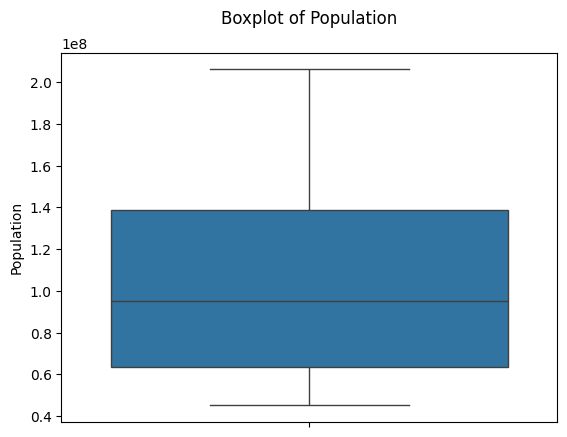

In [35]:
#creating boxplots to determine the presence of outliers
sns.boxplot(y='Population', data=Naija_df)
plt.title('Boxplot of Population\n')
plt.show()

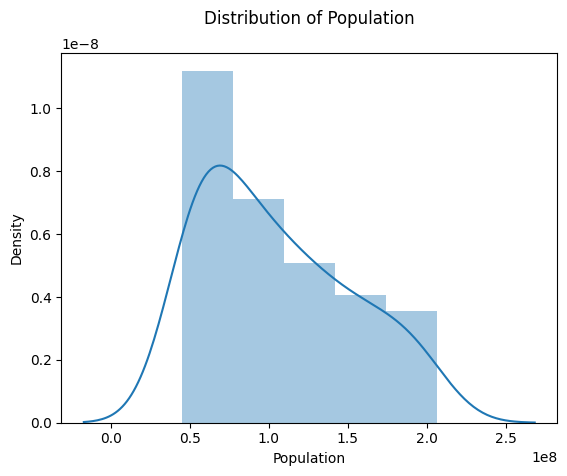

In [36]:
#exploring the distribution of the data
sns.distplot(Naija_df['Population'], kde = True)
plt.title('Distribution of Population\n')
plt.show()

In [37]:
#exploring the skewness of 'Population' data
Naija_df['Population'].skew()

0.5630637789908473

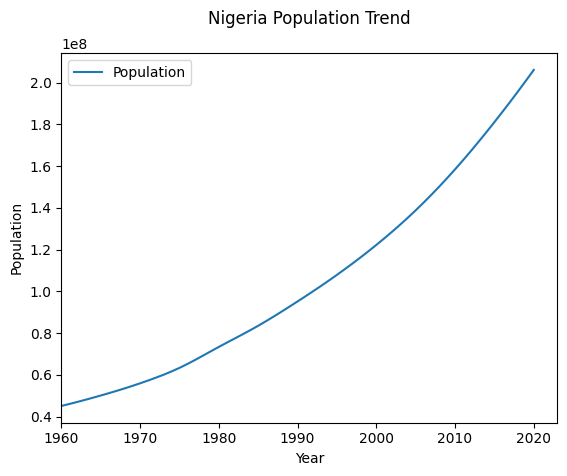

In [38]:
#checking for the trend of population increase with respect to year
Naija_df.plot('Year', 'Population')
plt.title('Nigeria Population Trend\n')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xlim(1960)
plt.show()

# Data Analysis


1. •	Which country and region has experienced the highest percentage of population growth in last 60 years



In [39]:
#looking into our dataset#
df.head(5)

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [40]:
#creating a new column showing the difference between year 2020 and 1960 population#
df['pop_growth'] = df['2020'] - df['1960']

In [41]:
#rechecking our dataset for the new column added#
df.head(5)

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,pop_growth
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,52558.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,546406534.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,29931374.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,362407057.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,27411330.0


In [42]:
#Creating a new dataframe showing the relevant columns for this question#
q1_df = df[['Country Code', 'Region', 'IncomeGroup', 'TableName', '1960', '2020', 'pop_growth']]
q1_df.head(5)


,Country Code,Region,IncomeGroup,TableName,1960,2020,pop_growth
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,106766.0,52558.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,677243299.0,546406534.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,38928341.0,29931374.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,458803476.0,362407057.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,32866268.0,27411330.0


In [43]:
#creating a new column to show the perctange increase in population growth between 2020 and 1960
q1_df['perct_growth'] = (q1_df['pop_growth']/q1_df['1960'])*100

In [44]:
#top 5 rows
q1_df.head(5)

,Country Code,Region,IncomeGroup,TableName,1960,2020,pop_growth,perct_growth
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,106766.0,52558.0,96.956169
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,677243299.0,546406534.0,417.624613
2,AFG,South Asia,Low income,Afghanistan,8996967.0,38928341.0,29931374.0,332.682936
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,458803476.0,362407057.0,375.954896
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,32866268.0,27411330.0,502.504886


In [45]:
#sort values descending by percentage population growth#
q1_df.sort_values(by='perct_growth', ascending=False, inplace=True)

In [46]:
#round percentage population growth to 1 decimal number
q1_df['perct_growth'] = q1_df['perct_growth'].round(1)

In [47]:
#creating a dataframe showcasing the top 5 countries with the highest population growth#
top_perc_incre = q1_df.head(5)
top_perc_incre

,Country Code,Region,IncomeGroup,TableName,1960,2020,pop_growth,perct_growth
8,ARE,Middle East & North Africa,High income,United Arab Emirates,92417.0,9890400.0,9797983.0,10601.9
200,QAT,Middle East & North Africa,High income,Qatar,47383.0,2881060.0,2833677.0,5980.4
127,KWT,Middle East & North Africa,High income,Kuwait,269026.0,4270563.0,4001537.0,1487.4
225,SXM,Latin America & Caribbean,High income,Sint Maarten (Dutch part),2833.0,40812.0,37979.0,1340.6
56,DJI,Middle East & North Africa,Lower middle income,Djibouti,83634.0,988002.0,904368.0,1081.3


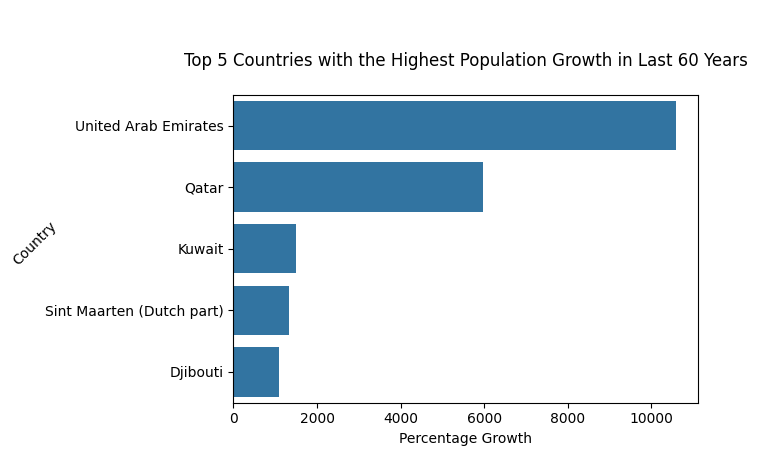

In [48]:


#barchart showing the top 5 countries with highest population growth#
plt.figure(figsize=(6,4))
ax = sns.barplot(x='perct_growth', y='TableName', data=top_perc_incre)
ax.set_xlabel('Percentage Growth')
ax.set_ylabel('Country', rotation =45)
ax.set_title('\n\nTop 5 Countries with the Highest Population Growth in Last 60 Years\n')
plt.show()

In [49]:
#reseting index#
new = top_perc_incre.reset_index()

In [50]:
#confirming our index has been reset#
new

,index,Country Code,Region,IncomeGroup,TableName,1960,2020,pop_growth,perct_growth
0,8,ARE,Middle East & North Africa,High income,United Arab Emirates,92417.0,9890400.0,9797983.0,10601.9
1,200,QAT,Middle East & North Africa,High income,Qatar,47383.0,2881060.0,2833677.0,5980.4
2,127,KWT,Middle East & North Africa,High income,Kuwait,269026.0,4270563.0,4001537.0,1487.4
3,225,SXM,Latin America & Caribbean,High income,Sint Maarten (Dutch part),2833.0,40812.0,37979.0,1340.6
4,56,DJI,Middle East & North Africa,Lower middle income,Djibouti,83634.0,988002.0,904368.0,1081.3


In [51]:
#drafting out the details of the region and country with highest growth#
top_region_country = new.loc[0, ['Region', 'TableName', 'perct_growth']]
top_region_country

,0
Region,Middle East & North Africa
TableName,United Arab Emirates
perct_growth,10601.9


In [52]:
#stating the country and region with highest population growth and its value#
print(f'{top_region_country[1]} is the Country with the highest population in {top_region_country[0]} Region  with a growth of {top_region_country[2]}%')

United Arab Emirates is the Country with the highest population in Middle East & North Africa Region  with a growth of 10601.9%


2. •	Determine the trend of population growth worldwide in the last 60 years

In [53]:
#having an overview of our dataset again
df.head(5)

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,pop_growth
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,52558.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,546406534.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,29931374.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,362407057.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,27411330.0


In [54]:
#checking out the columns
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'TableName', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', 'pop_growth'],
      dtype='object')

In [55]:
#pulling out necessary columns
years = df.iloc[:, 4:65]
years.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [56]:
#transposing the columns
tr_years = years.transpose()
tr_years.shape

(61, 266)

In [57]:
#summing up population accross all countries
tr_years['total_pop'] = tr_years.sum(axis=1)
tr_years.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,total_pop
1960,54208.0,130836765.0,8996967.0,96396419.0,5454938.0,1608800.0,13410.0,92197715.0,92417.0,20481781.0,...,32670048.0,63689.0,3.032156e+09,108627.0,947000.0,5315351.0,17099836.0,3070780.0,3776679.0,3.097025e+10
1961,55434.0,134159786.0,9169406.0,98407221.0,5531451.0,1659800.0,14378.0,94724540.0,100801.0,20817270.0,...,33666111.0,65700.0,3.071596e+09,112112.0,966000.0,5393034.0,17524533.0,3164330.0,3905038.0,3.137868e+10
1962,56234.0,137614644.0,9351442.0,100506960.0,5608499.0,1711319.0,15379.0,97334438.0,112112.0,21153042.0,...,34683410.0,67793.0,3.124561e+09,115768.0,994000.0,5473671.0,17965733.0,3260645.0,4039209.0,3.193552e+10
1963,56699.0,141202036.0,9543200.0,102691339.0,5679409.0,1762621.0,16407.0,100034191.0,125130.0,21488916.0,...,35721213.0,69944.0,3.189656e+09,119552.0,1022000.0,5556767.0,18423157.0,3360099.0,4178726.0,3.262729e+10
1964,57029.0,144920186.0,9744772.0,104953470.0,5734995.0,1814135.0,17466.0,102832792.0,138049.0,21824427.0,...,36780001.0,72116.0,3.255146e+09,123346.0,1050000.0,5641598.0,18896303.0,3463211.0,4322854.0,3.332465e+10


In [58]:
#resetting index
tr_years.reset_index(inplace=True)

In [59]:
#overview of the dataset
tr_years.head()

,index,0,1,2,3,4,5,6,7,8,...,257,258,259,260,261,262,263,264,265,total_pop
0,1960,54208.0,130836765.0,8996967.0,96396419.0,5454938.0,1608800.0,13410.0,92197715.0,92417.0,...,32670048.0,63689.0,3.032156e+09,108627.0,947000.0,5315351.0,17099836.0,3070780.0,3776679.0,3.097025e+10
1,1961,55434.0,134159786.0,9169406.0,98407221.0,5531451.0,1659800.0,14378.0,94724540.0,100801.0,...,33666111.0,65700.0,3.071596e+09,112112.0,966000.0,5393034.0,17524533.0,3164330.0,3905038.0,3.137868e+10
2,1962,56234.0,137614644.0,9351442.0,100506960.0,5608499.0,1711319.0,15379.0,97334438.0,112112.0,...,34683410.0,67793.0,3.124561e+09,115768.0,994000.0,5473671.0,17965733.0,3260645.0,4039209.0,3.193552e+10
3,1963,56699.0,141202036.0,9543200.0,102691339.0,5679409.0,1762621.0,16407.0,100034191.0,125130.0,...,35721213.0,69944.0,3.189656e+09,119552.0,1022000.0,5556767.0,18423157.0,3360099.0,4178726.0,3.262729e+10
4,1964,57029.0,144920186.0,9744772.0,104953470.0,5734995.0,1814135.0,17466.0,102832792.0,138049.0,...,36780001.0,72116.0,3.255146e+09,123346.0,1050000.0,5641598.0,18896303.0,3463211.0,4322854.0,3.332465e+10


In [60]:
#pulling out needed columns
trend_60years = tr_years.iloc[:, [0,267]]
trend_60years.head()

,index,total_pop
0,1960,3.097025e+10
1,1961,3.137868e+10
2,1962,3.193552e+10
3,1963,3.262729e+10
4,1964,3.332465e+10


In [61]:
#renaming columns
trend_60years.rename(columns={'index': 'Year', 'total_pop': 'Population'}, inplace=True)

In [62]:
#top rows
trend_60years.head()

,Year,Population
0,1960,3.097025e+10
1,1961,3.137868e+10
2,1962,3.193552e+10
3,1963,3.262729e+10
4,1964,3.332465e+10


In [63]:
#check for data types
trend_60years.dtypes

,0
Year,object
Population,float64


In [64]:
#Change Year data type
trend_60years['Year'] = pd.to_datetime(trend_60years['Year']).dt.year

In [65]:
#recheck the data type
trend_60years.dtypes

,0
Year,int32
Population,float64


In [66]:
#top rows
trend_60years.head()

,Year,Population
0,1960,3.097025e+10
1,1961,3.137868e+10
2,1962,3.193552e+10
3,1963,3.262729e+10
4,1964,3.332465e+10


In [67]:
#rename columns
trend_60years.rename(columns={'Year': 'Date'}, inplace=True)

In [68]:
#reset index
trend_60years.set_index('Date', inplace=True)

In [69]:
#top rows
trend_60years.head()

,Population
Date,
1960,3.097025e+10
1961,3.137868e+10
1962,3.193552e+10
1963,3.262729e+10
1964,3.332465e+10


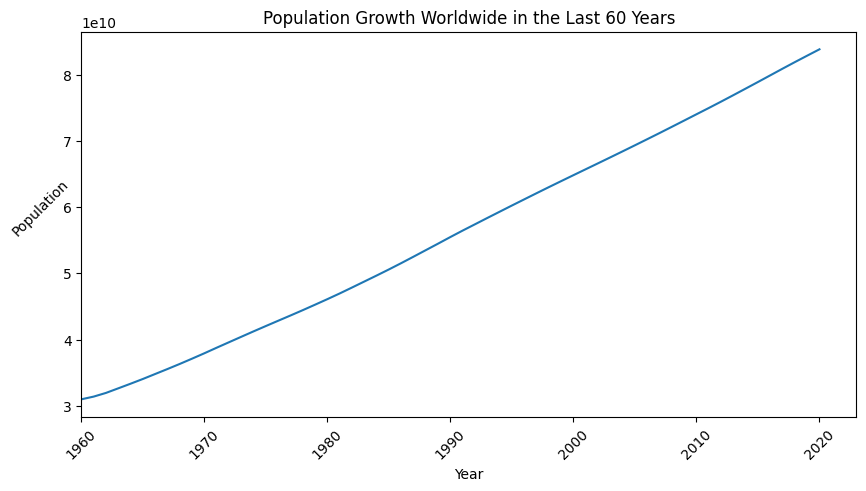

In [70]:
#plot the trend of population worldwide in last 60 years
plt.figure(figsize=(10,5))
sns.lineplot(x= trend_60years.index, y='Population', data=trend_60years)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.xlim(1960)
plt.ylabel('Population\n', rotation = 45)
plt.title('Population Growth Worldwide in the Last 60 Years')
plt.show()

3. Forecast world population in next 30 years

In [71]:
#determine best pdq and seasonal parameters
auto_model = pm.auto_arima(trend_60years['Population'], start_p=0, start_q=0,
                          max_p=5, max_q=5, seasonal=False,
                          d=None, stepwise=True, trace = True,
                          error_action='ignore',
                          suppress_warnings=True, information_criterion='aic')

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2196.694, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2183.656, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2222.621, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2200.826, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2118.105, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2129.930, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2129.601, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2141.717, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2131.201, Time=0.53 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2122.219, Time=0.19 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 1.748 seconds


In [72]:
#auto model summary
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(2, 2, 0)   Log Likelihood               -1055.053
Date:                Fri, 23 Aug 2024   AIC                           2118.105
Time:                        10:33:39   BIC                           2126.415
Sample:                             0   HQIC                          2121.349
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.208e+06   1.51e-11   2.12e+17      0.000    3.21e+06    3.21e+06
ar.L1         -0.0091      0.017     -0.553      0.581      -0.041       0.023
ar.L2         -0.0043      0.006     -0.667      0.5

In [73]:
#fit the model
best_model = auto_model.fit(trend_60years['Population'])

In [74]:
#forecast for next 30 years
forecast = best_model.predict(n_periods=30)

In [75]:

#generate future date range
forecast_years = pd.date_range(start='2021-01-01', periods=30, freq='Y').year
forecast_years

Index([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
       2045, 2046, 2047, 2048, 2049, 2050],
      dtype='int32')

In [76]:
#create dataframe with forecasted values
forecast_df = pd.DataFrame({'Date': forecast_years, 'Population': forecast})

In [77]:
#top rows
forecast_df.head()

,Date,Population
61,2021,8.477951e+10
62,2022,8.574818e+10
63,2023,8.672001e+10
64,2024,8.769501e+10
65,2025,8.867317e+10


In [78]:
#reset index
forecast_df.set_index('Date', inplace=True)
forecast_df

,Population
Date,
2021,8.477951e+10
2022,8.574818e+10
2023,8.672001e+10
2024,8.769501e+10
2025,8.867317e+10
2026,8.965450e+10
2027,9.063899e+10
2028,9.162665e+10
2029,9.261747e+10


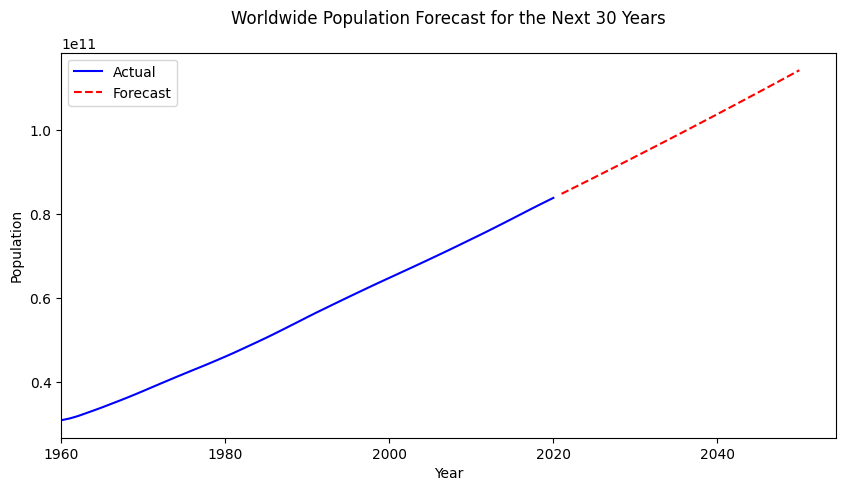

In [108]:
#plot the actual and forecast values
plt.figure(figsize=(10,5))
plt.plot(trend_60years, label='Actual', color = 'blue')
plt.plot(forecast_df, label='Forecast', color = 'red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xlim(1960)
plt.title('Worldwide Population Forecast for the Next 30 Years\n')
plt.legend()
plt.show()

4. •	What is the relationship between income group and population growth in last 60 years.



In [80]:
#top rows
df.head()

,Country Code,Region,IncomeGroup,TableName,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,pop_growth
0,ABW,Latin America & Caribbean,High income,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,52558.0
1,AFE,NaN,NaN,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,546406534.0
2,AFG,South Asia,Low income,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,29931374.0
3,AFW,NaN,NaN,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,362407057.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,27411330.0


In [81]:
#group population growth by income group
socio_df = df.groupby('IncomeGroup')['pop_growth'].mean().sort_values(ascending=False).round(1)
socio_df

,pop_growth
IncomeGroup,
Lower middle income,43256764.3
Upper middle income,25040155.1
Low income,20185686.1
High income,5598284.9


High income countries have the lowest population growth followed by Low income countries. On the other hand, middle income countries have the highest population growth

In [82]:
#reset index
df_socio = socio_df.reset_index()
df_socio

,IncomeGroup,pop_growth
0,Lower middle income,43256764.3
1,Upper middle income,25040155.1
2,Low income,20185686.1
3,High income,5598284.9


In [83]:
print(f'{socio_df.index[0]} has the highest population growth with a value of {socio_df[0]}')

Lower middle income has the highest population growth with a value of 43256764.3


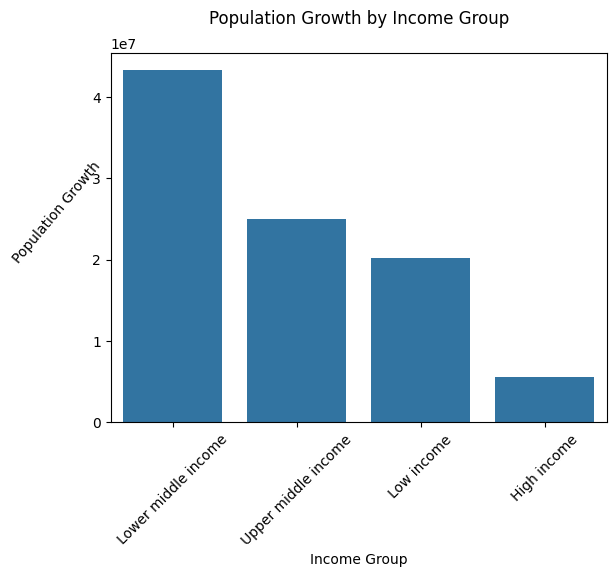

In [84]:
sns.barplot(x='IncomeGroup', y='pop_growth', data=df_socio)
plt.xticks(rotation=45)
plt.xlabel('Income Group')
plt.ylabel('Population Growth\n\n', rotation = 50)
plt.title('Population Growth by Income Group\n')
plt.show()

5. •	Determine the percentage change in population growth over the last 60 years in Nigeria

In [85]:
#top rows
Naija_df.head()

,Year,Population
0,1960,45138460.0
1,1961,46063570.0
2,1962,47029818.0
3,1963,48032932.0
4,1964,49066762.0


In [86]:
#create new column to show growth change
def Pop_Growth(row):
  if row.name == 0:
    return 0
  else:
      return row['Population'] - Naija_df.loc[row.name-1, 'Population']

Naija_df['Growth_Increase'] = Naija_df.apply(Pop_Growth, axis=1)
Naija_df.head()


,Year,Population,Growth_Increase
0,1960,45138460.0,0.0
1,1961,46063570.0,925110.0
2,1962,47029818.0,966248.0
3,1963,48032932.0,1003114.0
4,1964,49066762.0,1033830.0


In [87]:
#create new column to show percentage growth change
def growth_percent(row):
  if row.name == 0:
    return 0
  else:
    return (row['Growth_Increase']/Naija_df.loc[row.name-1, 'Population'])*100

Naija_df['Percent_Growth'] = Naija_df.apply(growth_percent, axis=1).round(2)
Naija_df.head()

,Year,Population,Growth_Increase,Percent_Growth
0,1960,45138460.0,0.0,0.00
1,1961,46063570.0,925110.0,2.05
2,1962,47029818.0,966248.0,2.10
3,1963,48032932.0,1003114.0,2.13
4,1964,49066762.0,1033830.0,2.15


6. •	Determine the percentage growth between each year over the last 60 years and sort descending.

In [88]:
#sort values descending
sorted_naijadf = Naija_df.sort_values(by='Percent_Growth', ascending=False)
sorted_naijadf

,Year,Population,Growth_Increase,Percent_Growth
18,1978,69271915.0,2068781.0,3.08
17,1977,67203134.0,1981755.0,3.04
19,1979,71361141.0,2089226.0,3.02
16,1976,65221379.0,1847090.0,2.91
20,1980,73423646.0,2062505.0,2.89
...,...,...,...,...
4,1964,49066762.0,1033830.0,2.15
3,1963,48032932.0,1003114.0,2.13
2,1962,47029818.0,966248.0,2.10
1,1961,46063570.0,925110.0,2.05


7. •	Determine the trend of population growth in last 60 years  in Nigeria

In [89]:


#top 20 rows
Naija_df.head(20)

,Year,Population,Growth_Increase,Percent_Growth
0,1960,45138460.0,0.0,0.00
1,1961,46063570.0,925110.0,2.05
2,1962,47029818.0,966248.0,2.10
3,1963,48032932.0,1003114.0,2.13
4,1964,49066762.0,1033830.0,2.15
5,1965,50127920.0,1061158.0,2.16
6,1966,51217969.0,1090049.0,2.17
7,1967,52342231.0,1124262.0,2.20
8,1968,53506201.0,1163970.0,2.22
9,1969,54717035.0,1210834.0,2.26


In [90]:
#last 20 rows
Naija_df.tail(20)

,Year,Population,Growth_Increase,Percent_Growth
41,2001,125394046.0,3110193.0,2.54
42,2002,128596079.0,3202033.0,2.55
43,2003,131900634.0,3304555.0,2.57
44,2004,135320420.0,3419786.0,2.59
45,2005,138865014.0,3544594.0,2.62
46,2006,142538305.0,3673291.0,2.65
47,2007,146339971.0,3801666.0,2.67
48,2008,150269622.0,3929651.0,2.69
49,2009,154324939.0,4055317.0,2.70
50,2010,158503203.0,4178264.0,2.71


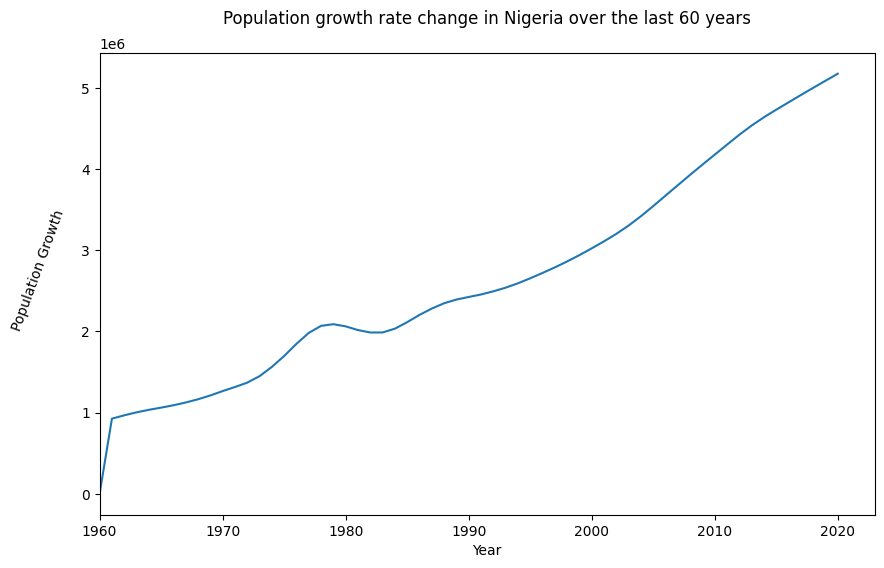

In [91]:

#population growth in Nigeria over the last 60 years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Growth_Increase', data=Naija_df)
plt.title('Population growth rate change in Nigeria over the last 60 years\n')
plt.xlim(1960)
plt.ylabel('Population Growth\n\n', rotation = 70)
plt.xlabel('Year')
plt.show()

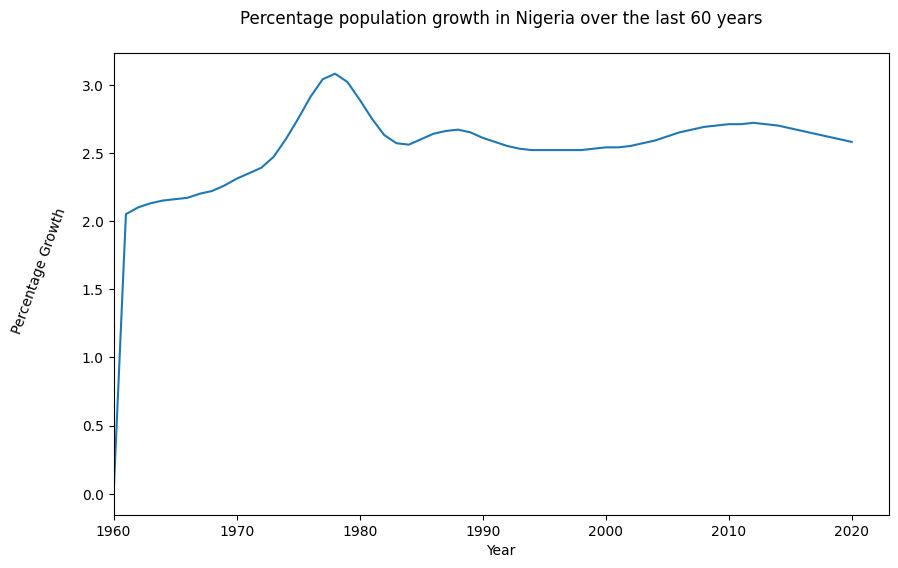

In [92]:

#percentage population growth in Nigeria over the last 60 years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Percent_Growth', data=Naija_df)
plt.title('Percentage population growth in Nigeria over the last 60 years\n')
plt.xlim(1960)
plt.ylabel('Percentage Growth\n\n', rotation = 70)
plt.xlabel('Year')
plt.show()

8. •	Forecast Nigeria population in next 10 years.

In [93]:
#top rows
Naija_df.head()

,Year,Population,Growth_Increase,Percent_Growth
0,1960,45138460.0,0.0,0.00
1,1961,46063570.0,925110.0,2.05
2,1962,47029818.0,966248.0,2.10
3,1963,48032932.0,1003114.0,2.13
4,1964,49066762.0,1033830.0,2.15


In [94]:
#create a new dataframe with Year and Population
q8_df = Naija_df[['Year', 'Population']]
q8_df.head()

,Year,Population
0,1960,45138460.0
1,1961,46063570.0
2,1962,47029818.0
3,1963,48032932.0
4,1964,49066762.0


In [95]:
#rename columns
q8_df.rename(columns={'Year': 'Date'}, inplace=True)

In [96]:
#reset index
q8_df.set_index('Date', inplace=True)

In [97]:
#top rows
q8_df.head()

,Population
Date,
1960,45138460.0
1961,46063570.0
1962,47029818.0
1963,48032932.0
1964,49066762.0


In [98]:
#determine the best pdq and seasonal parameters
auto_model = pm.auto_arima(q8_df['Population'], start_p=0, start_q=0,
                          max_p=5, max_q=5, seasonal=False,
                          d=None, stepwise=True, trace = True,
                          error_action='ignore',
                          suppress_warnings=True, information_criterion='aic')



Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1429.842, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1488.105, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1431.237, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1507.147, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1740.302, Time=1.48 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 1.919 seconds


In [99]:
#print auto model summary
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -712.921
Date:                Fri, 23 Aug 2024   AIC                           1429.842
Time:                        10:33:58   BIC                           1433.997
Sample:                             0   HQIC                          1431.464
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.205e+04   5950.344     12.108      0.000    6.04e+04    8.37e+04
sigma2      1.832e+09   3.58e+08      5.118      0.000    1.13e+09    2.53e+09
Ljung-Box (L1) (Q):                  51.14   Jarque-

In [100]:
#fit the model
naija_bestmodel = auto_model.fit(q8_df['Population'])

In [101]:
#forecast for next 30 years
naija_forecast = naija_bestmodel.predict(n_periods=30)

In [102]:
#generate the date range for the forecast
naija_forecastyears = pd.date_range(start='2021-01-01', periods=30, freq='Y').year
naija_forecastyears

Index([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
       2045, 2046, 2047, 2048, 2049, 2050],
      dtype='int32')

In [103]:
#create a dataframe with generated values
forecastdf = pd.DataFrame({'Date': naija_forecastyears, 'Population': naija_forecast})
forecastdf

,Date,Population
61,2021,2.113876e+08
62,2022,2.167077e+08
63,2023,2.220998e+08
64,2024,2.275640e+08
65,2025,2.331002e+08
66,2026,2.387085e+08
67,2027,2.443888e+08
68,2028,2.501412e+08
69,2029,2.559656e+08
70,2030,2.618621e+08


In [104]:
#reset index
forecastdf.set_index('Date', inplace=True)

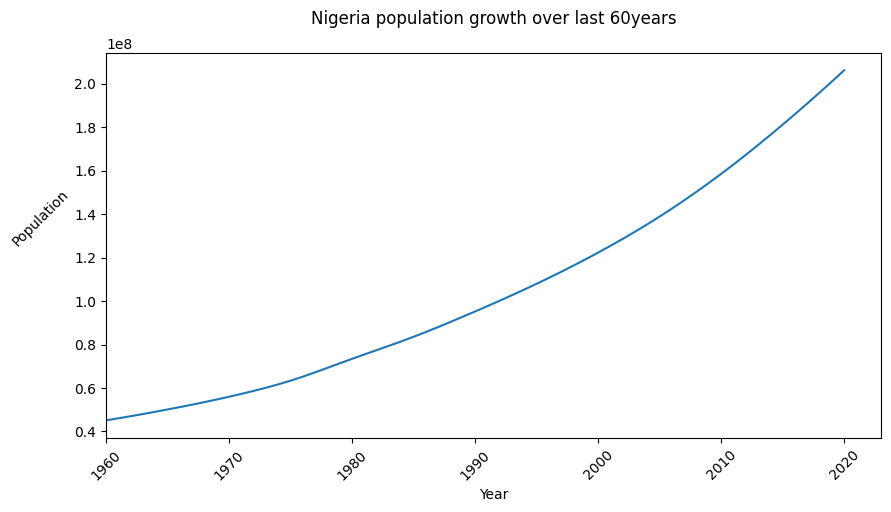

In [105]:
#plot the trend of Nigeria population growth over the last 60 years
plt.figure(figsize=(10,5))
sns.lineplot(x= q8_df.index, y='Population', data=q8_df)
plt.xticks(rotation=45)
plt.xlim(1960)
plt.xlabel('Year')
plt.ylabel('Population\n\n', rotation = 45)
plt.title('Nigeria population growth over last 60years\n')
plt.show()

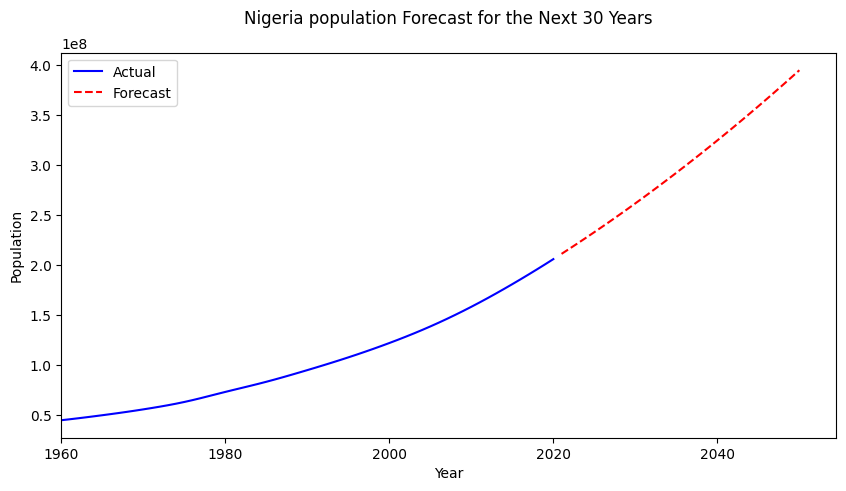

In [106]:
#plot the forecast
plt.figure(figsize=(10,5))
plt.plot(q8_df, label='Actual', color = 'blue')
plt.plot(forecastdf, label='Forecast', color = 'red', linestyle='--')
plt.xlim(1960)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Nigeria population Forecast for the Next 30 Years\n')
plt.legend()
plt.show()